In [1]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

In [3]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((1024, 1024))

def move_and_show(latent_vector, directions, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        for direction in directions:
            new_latent_vector[:8] = (new_latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [4]:
# Loading already learned latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('ffhq_dataset/latent_directions/age.npy')
#facemakeup_direction = np.load('facemakeup_direction.npy')
# In general it's possible to find directions of almost any face attributes: position, hair style or color ... 
# Additional scripts for doing so will be realised soon

(1, 512)
(1, 18, 512)


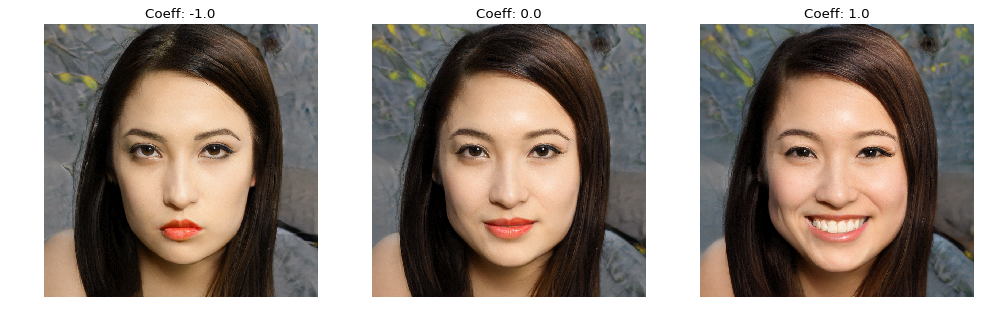

NameError: name 'facemakeup_direction' is not defined

In [5]:
rnd = np.random.RandomState(1733) # 829,829,1733
latents = rnd.randn(1, Gs_network.input_shape[1])
print(latents.shape)
dlatents = Gs_network.components.mapping.run(latents, None)
print(dlatents.shape)
src_images = Gs_network.components.synthesis.run(dlatents, randomize_noise=False)
move_and_show(dlatents, [smile_direction], [-1, 0, 1])
move_and_show(dlatents, [facemakeup_direction], [-1, 0, 1])


In [ ]:
import caffe
model = '/home/bademi/stylegan-encoder/AFFACT.prototxt';
weights = 'AFFACT.caffemodelAFFACT.caffemodel';

caffe.set_mode_gpu();
caffe.set_device(0);

net = caffe.Net('/home/bademi/stylegan-encoder/AFFACT.prototxt', '/home/bademi/stylegan-encoder/AFFACT-S.caffemodel.h5', caffe.TEST)
import numpy as np
from scipy.misc import imread, imsave, imresize

image = np.array(imread('girl.png'));
im_input = image[np.newaxis, np.newaxis, :, :]

net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input

output = net.forward()
print(output)



In [ ]:
image = generate_image(dlatents)
image.save("girl.png","PNG")


In [ ]:

res = net.forward({image});
#prob = res{1};


In [ ]:
print(net.blobs['data'].shape)

In [ ]:
from scipy.misc import imread, imsave, imresize
import PIL.Image

PIL.Image.fromarray(imread('girl.png'), 'RGB')

In [ ]:
import caffe
model = '/home/bademi/stylegan-encoder/AFFACT.prototxt';
weights = 'AFFACT.caffemodelAFFACT.caffemodel';

caffe.set_mode_gpu();
caffe.set_device(0);

net = caffe.Net('/home/bademi/stylegan-encoder/AFFACT.prototxt', '/home/bademi/stylegan-encoder/AFFACT-S.caffemodel.h5', caffe.TEST)
import numpy as np
from scipy.misc import imread, imsave, imresize

image = np.array(imread('girl.png'));
image = image.transpose(2,0,1)
im_input = image[np.newaxis, :, :, :]
print(im_input.shape)
net.blobs['data'].data[...] = im_input

output = net.forward()
print(output)

In [ ]:
attributes = '''5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young'''.split('\n')

In [ ]:
from scipy.stats import logistic

for a,b in zip(logistic.cdf(output['attributes'][0]), attributes):
    print(a,b)


In [ ]:
print(attributes)

In [ ]:
output['attributes']